# SIRモデル

## 記号の定義


* $S(t)$ : 時点$t$における未感染者数
* $I(t)$ : 時点$t$における感染者数
* $R(t)$ : 時点$t$における感染済かつ回復者数(免疫保持者数)
* $S(t)+I(t)+R(t) \equiv N(t)=N$ :総人口(死亡者数を含め保存されるものとする)
* $\beta$ : 未感染者が感染者と1回の接触で感染する確率
* $\gamma$ : 感染者が1日の内に回復し感染力を失う確率
    
(※)便宜的に各パラメータを定義する際，時間軸の単位を日としている



## 感染ダイナミクス 

時点$t$において，未感染者1人がのべ$j$人と接触したときに，感染から**免れる確率**は以下で与えられる：

$$
\left( 1 - \frac{\beta I(t)}{N} \right)^{j} 
$$

ここで，ある1人が1日にのべ$j$人と接触する確率を$P(j)$と定義すると，時点$t$から時点$t+1$の間に増加する感染者数の期待値は次のように書ける：
$$
S(t+1)-S(t) = 
S(t) \times
\sum^{\infty}_{j=0}
\left[1-
\left( 1 - \frac{\beta I(t)}{N} \right)^{m}
\right]P(m)
$$

この感染者数の増分期待値および回復率$\gamma$を用いて，SIRダイナミクスは
次の差分方程式で表される：

$$
\begin{align}
  S(t+1) &= S(t) -
  S(t)
  \sum^{\infty}_{j=0}
  \left[1-
  \left( 1 - \frac{\beta I(t)}{N} \right)^{j}
  \right]P(j)
  \\
  I(t+1) &=   I(t) + S(t)
  \sum^{\infty}_{j=0}
  \left[1-
  \left( 1 - \frac{\beta I(t)}{N} \right)^{j}
  \right]P(j)　- \gamma I(t)
  \\
  R(t+1) &= R(t) + \gamma I(t)
\end{align}
$$

ここで，人口に対する各群の比率$\widehat{S}(t) \equiv \dfrac{S(t)}{N}
,\widehat{I}(t) \equiv \dfrac{I(t)}{N}
,\widehat{R}(t) \equiv \dfrac{R(t)}{N}$を導入すれば，先の差分方程式は以下に帰着する：

$$
\begin{align}
  \widehat{S}(t+1) &= \widehat{S}(t) -
  \widehat{S}(t)
  \sum^{\infty}_{j=0}
  \left[1-
  \left( 1 - \beta \widehat{I}(t) \right)^{j}
  \right]P(j)
  \\
  \widehat{I}(t+1) &=   \widehat{I}(t) + 
  \widehat{S}(t)
  \sum^{\infty}_{j=0}
  \left[1-
  \left( 1 - \beta \widehat{I}(t) \right)^{j}
  \right]P(j) -  \gamma \widehat{I}(t)
  \\
  \widehat{R}(t+1) &= \widehat{R}(t) + \gamma \widehat{I}(t)
\end{align}
$$

>(※)以下補足：$P(j)$が期待値$\lambda$のポアソン分布$P(j)=\lambda^{j}\mathrm{e}^{-\lambda}/j!$であるとき，時間ステップ長の極限$\Delta t \rightarrow 0$において，次に示す連続時間型SIRモデルと対応する．
>
>$$
\begin{align}
  \dfrac{\mathrm{d} \widehat{S}(t)}{\mathrm{d}t} &= - 
  \lambda \beta \widehat{S}(t) \widehat{I}(t)
  \\
  \dfrac{\mathrm{d} \widehat{I}(t)}{\mathrm{d}t} &=
  \lambda \beta \widehat{S}(t) \widehat{I}(t) - \gamma \widehat{I}(t)
  \\
  \dfrac{\mathrm{d} \widehat{R}(t)}{\mathrm{d}t} &=
  \gamma \widehat{I}(t)
\end{align}
$$
>
>
>多くの連続時間モデルでは，$\lambda \beta$を感染率と定義しているケースが多い．このときの感染率は，ウイルス固有の値でなく人々の接触の仕方の情報(ポアソン分布)も含まれていると捉えることもできる．連続モデルと離散モデルの対応の詳細は[瀬野,2011](https://repository.kulib.kyoto-u.ac.jp/dspace/bitstream/2433/171302/1/1757-07.pdf)を参照した．

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
T_ini = 100
S_ini = 1
I_ini = 0
R_ini = 0

class Prameter:
    def __init__(self,N):
        self.N = N
        self.gamma = 0.2
        self.beta = 0.3
        self.m = 5
        
    
class Model:
    def __init__(self, prm, S=S_ini, I=I_ini, R=R_ini, T=T_ini):
        self.prm  = prm
        
        self.S = float(S)
        self.I = float(I)
        self.R = float(R)
        
        self.T = T
        
        
        self.S_list = []
        self.S_list.append(S)
        
        self.I_list = []
        self.I_list.append(I)
        
        self.R_list = []
        self.R_list.append(R)
               
        self.m_list = []

    
    def solve_NC(self):
        
        
        for t in range(self.T):
            m = self.prm.m
            self.newI = (1-(1-self.prm.beta*self.I)**m)*self.S
            
            self.m_list.append(m)
            
            New_S = self.S_dynamics()
            New_I = self.I_dynamics()
            New_R = self.R_dynamics()
            
        
            self.Update(New_S, New_I, New_R)
        
    def S_dynamics(self):
        m = self.m_list[-1]
        New_S \
        = self.S \
        - (1-(1-self.prm.beta*self.I)**m)*self.S
        
        self.S_list.append(New_S)
        return New_S
        
        
    def I_dynamics(self):
        m = self.m_list[-1]
        New_I \
        = self.I\
        +(1-(1-self.prm.beta*self.I)**m)*self.S\
        - self.I*self.prm.gamma
        
        self.I_list.append(New_I)
        return New_I
        
    
    def R_dynamics(self):
        New_R \
        = self.R\
        + self.I * self.prm.gamma
        
        self.R_list.append(New_R)
        return New_R    
         
        
    def Update(self,New_S, New_I, New_R, ):
        self.S = New_S
        self.I = New_I
        self.R = New_R


In [3]:
prm = Prameter(N=1)

prm.gamma = 0.07 
prm.beta = 0.1   
prm.m =5

model = Model(prm=prm, T=150, I=10**(-3))
model.solve_NC()

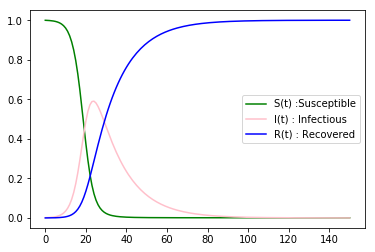

In [4]:
plt.plot(model.S_list, color='green', label='S(t) :Susceptible')
plt.plot(model.I_list, color='pink', label='I(t) : Infectious')
plt.plot(model.R_list, color='blue', label='R(t) : Recovered')

plt.legend()